In [ ]:
import pandas as pd
import os
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns
import cufflinks as cf

sns.set(style='darkgrid')

### Convert Excel to CSV reduce workload

In [ ]:
ukdata = pd.read_excel(r'/Users/danhosanee/Downloads/Dataset.xlsx')

In [ ]:
ukdata.to_csv('ukdata.csv', encoding='utf-8', index=False)

In [ ]:
#Set current dir to dic data folder
os.chdir('/Users/danhosanee/Downloads/contextCSVs (accidents)')

In [ ]:
ukData = pd.read_csv('ukdata.csv')

### Check the Data

In [ ]:
ukData.info()

### Add Data Dictionary to Answer Questions

## What is the Severity of Accidents depending:
### - the Speed Limit 
### - Seasonality - time of year, day of the week and time of the day
### - External factors e.g. Road type and light conditions 
### - Geography (Rural vs Urban areas)

In [5]:
#Severity of Accident Caterogies
accsev_dic = pd.read_csv('Accident_Severity.csv')

#Seasonality
dotw_dic = pd.read_csv('Day_of_Week.csv')

#External Factors
road_dic = pd.read_csv('Road_Type.csv')
light_dic = pd.read_csv('Light_Conditions.csv')

#Geography 
urban_rural_dic = pd.read_csv('Urban_Rural.csv')

## Speed Limit

In [6]:
ukData = ukData.merge(accsev_dic , how ='left', left_on=['Accident_Severity'], right_on=['code'])

In [7]:
ukData = ukData.rename(columns={'label':'Accident_Severity_Label'})

In [10]:
speed_gp = (ukData.groupby(['Accident_Severity_Label','Speed_limit'])['ID']
            .agg('count').unstack('Accident_Severity_Label').fillna(0))
           

speed_gp.style.highlight_max(color='red')

Accident_Severity_Label,Fatal,Serious,Slight
Speed_limit,,,
0,0,0,1
10,0,0,3
20,55,1890,10674
30,2214,47701,319183
40,636,7071,39518
50,448,3459,18075
60,2361,16193,61705
70,805,4925,33692


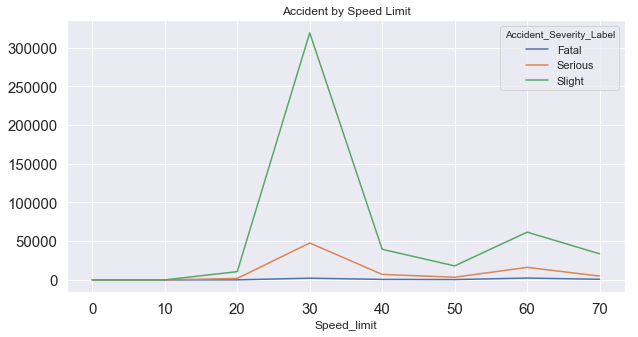

In [11]:
speed_gp.plot(kind='line', title='Accident by Speed Limit',
              figsize=(10,5), fontsize=15, sort_columns=True,
              )

## Seasonality: By Year, Weekday, Time of Day

In [12]:
#Convert Date Object to Datetime 
ukData['Date'] = pd.to_datetime(ukData['Date'], format='%Y-%m-%d')
ukData['Time'] = pd.to_datetime(ukData['Time'], format='%H:%M:%S')

#Get the Year only from Date column
ukData['Year'] = ukData.Date.dt.year

#Get the Month only from Month Column
ukData['Month'] = ukData.Date.dt.strftime('%b')

#Get the Time in Hour by hours column

ukData['Hour'] = ukData.Time.dt.hour.fillna(0).astype(int)

#Create an instance with the relevant columns
season = ukData[['ID','Date', 'Year', 'Month','Day_of_Week','Hour','Accident_Severity_Label']]

In [13]:
#Merge The Dictionary file with the Season Dataframe
season = (season.merge(dotw_dic, how ='left', left_on=['Day_of_Week'], right_on=['code'])
          .reindex(columns=['ID','Date', 'Year', 'Month','Day_of_Week','label','Hour','Accident_Severity_Label']))

In [14]:
#rename label column to Day
season =  season.rename(columns={"label":"Day"})

## By Time

In [ ]:
seasongrphr = season.groupby(['Accident_Severity_Label','Hour'])['ID'].count().unstack('Accident_Severity_Label')

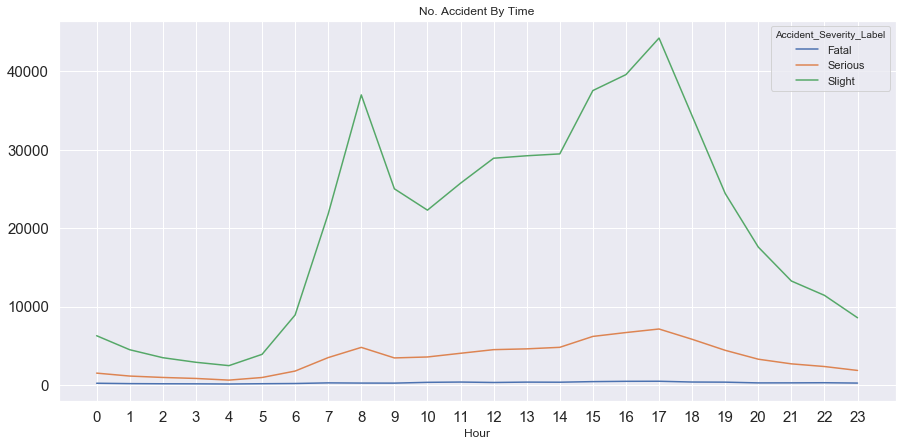

In [17]:
seasongrphr.plot(kind='line',figsize=(15,7),xticks=range(0,24),
                 title='No. Accident By Time',fontsize=15)

## By Year

In [ ]:
seasongrpyear = (season.groupby(['Accident_Severity_Label','Year'])['ID'].agg('count')
                 .unstack('Accident_Severity_Label'))

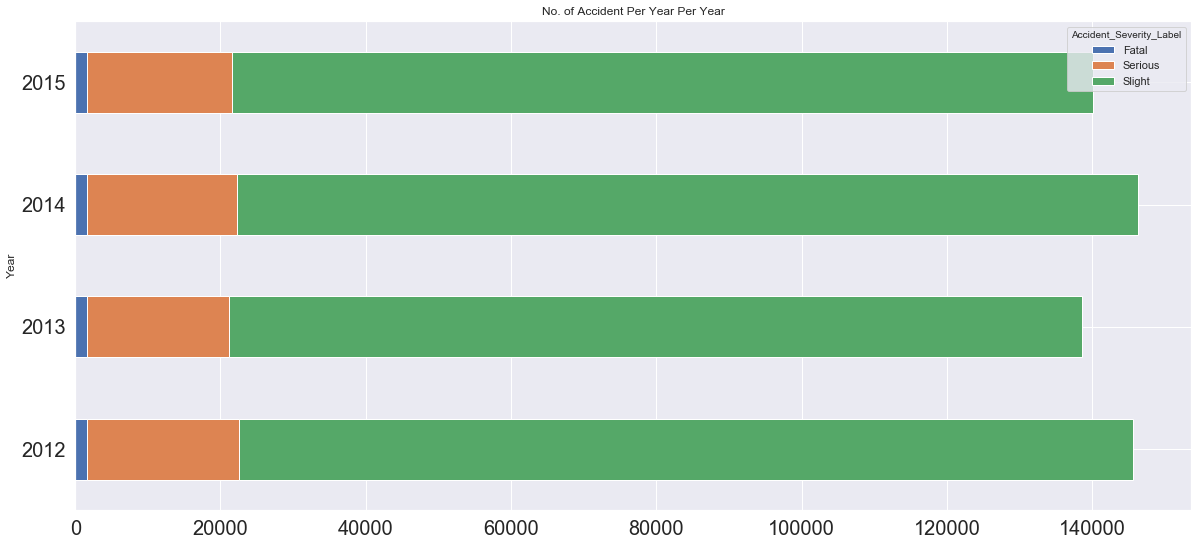

In [115]:
seasongrpyear.plot(kind='barh',stacked=True, figsize= (20,9)
                   ,fontsize=20,title='No. of Accident Per Year Per Year',
                   sharey=True)

### Per Month

In [ ]:
seasongrpmonth = season.groupby(['Month'])['ID'].agg('count').reindex(['Jan','Feb','Mar','Apr','May','Jun',
                                                                      'Jul','Aug','Sep','Oct','Nov','Dec'])

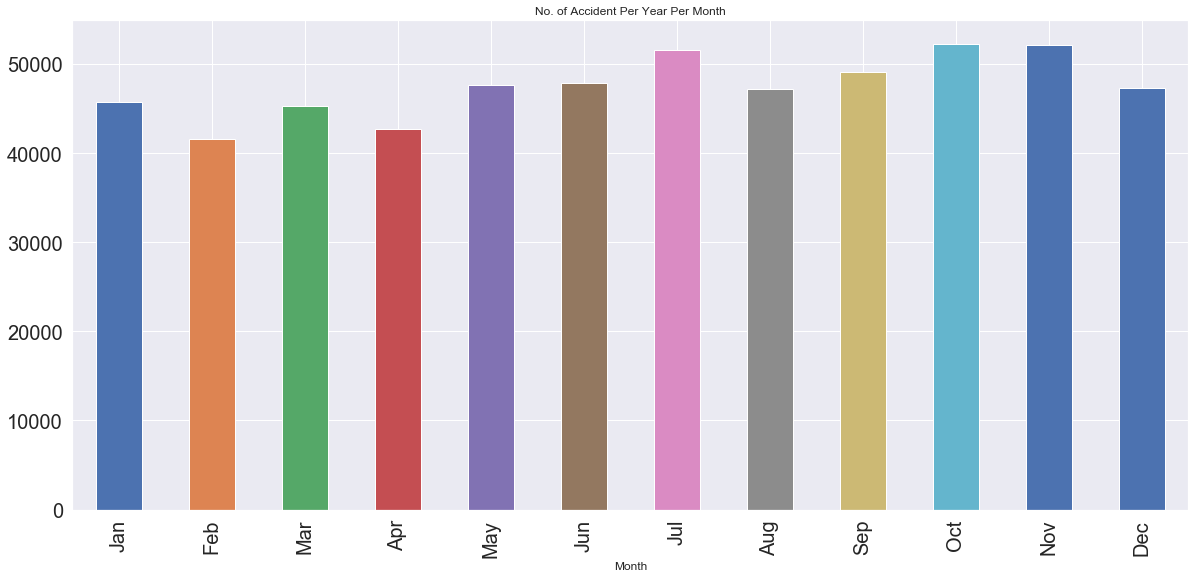

In [116]:
seasongrpmonth.plot(kind='bar', figsize= (20,9),fontsize=20,
                    title='No. of Accident Per Year Per Month')

### Per Day

In [ ]:
seasongrpday = (season.groupby(['Accident_Severity_Label','Day'])['ID'].agg('count')
                .unstack('Accident_Severity_Label').reindex(['Sunday','Monday','Tuesday','Wednesday',
                                                                  'Thursday','Friday','Saturday']))

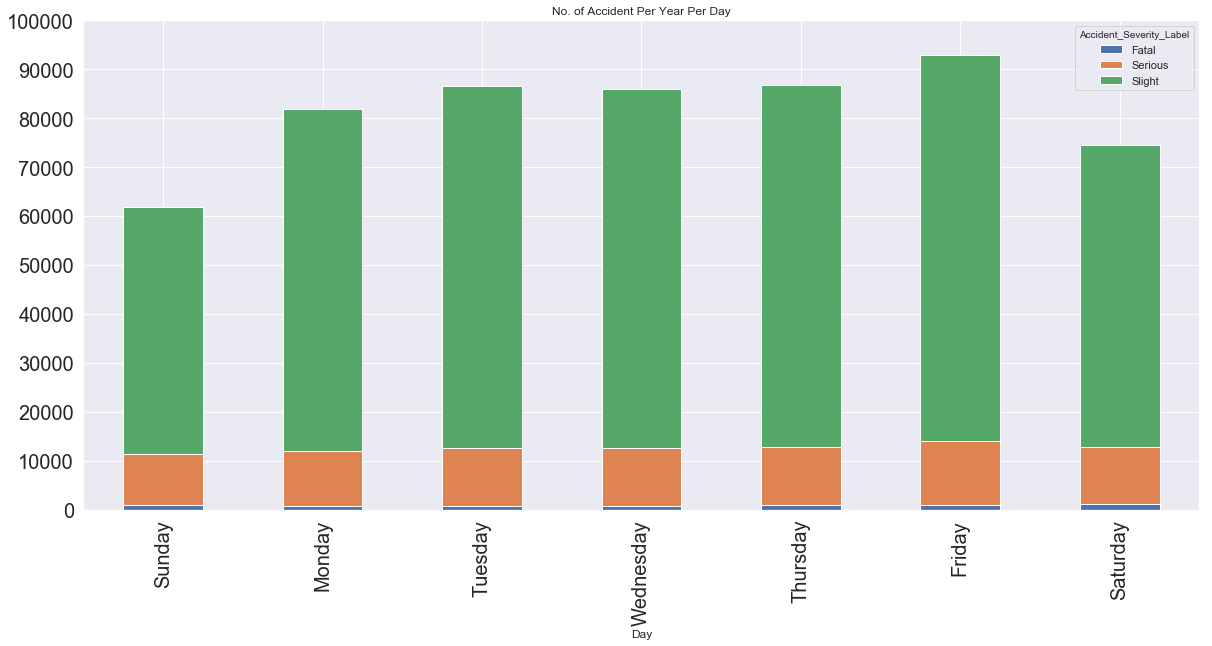

In [145]:
seasongrpday.plot(kind='bar',stacked=True, figsize= (20,9),fontsize=20,
                    title='No. of Accident Per Year Per Day',use_index=True,yticks=range(0,110000,10000))

## External Factors

In [ ]:
ukData[['ID','Light_Conditions','Road_Type']].sample(5)

### View the Dic Data for Road and Light Factors

In [ ]:
ukData.groupby(['Light_Conditions','Road_Type'])['ID'].agg('count').unstack('Light_Conditions')

In [ ]:
light_dic